In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [2]:
df = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\fdf_gdf.csv', low_memory=False, sep=",")

In [3]:
# Convert categorical columns to category type for memory efficiency
df["rideable_type"] = df["rideable_type"].astype("category")
df["start_station_name"] = df["start_station_name"].astype("category")
df["end_station_name"] = df["end_station_name"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")
df["day_of_week"] = df["day_of_week"].astype("category")
df["holiday"] = df["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df["holiday"] = df["holiday"].astype("category")

df['month'] = df['month'].astype('int32')

df["ride_duration"] = pd.to_timedelta(df["ride_duration"])

# Filter dataframe for Ward 7

In [4]:
df_w7 = df[df['start_ward'] == 7]

In [5]:
df_w7

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
161,9326782,electric_bike,2023-09-14 18:09:35,2023-09-14 18:22:45,15th & East Capitol St NE,31630.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.889944,-76.983485,38.884095,-76.995234,member,1.207143,9,2023,Autumn,Thursday,No,No,0 days 00:13:10,7,6,13.166667
169,9367599,classic_bike,2023-09-16 23:40:41,2023-09-16 23:44:18,Rosedale Rec Center,31658.0,Oklahoma Ave & D St NE,31712.0,38.897808,-76.979634,38.894474,-76.974828,member,0.557157,9,2023,Autumn,Saturday,No,Yes,0 days 00:03:37,7,7,3.616667
378,7533529,classic_bike,2023-05-17 07:24:51,2023-05-17 07:37:24,19th & East Capitol St SE,31601.0,Anacostia Roller Skating Pavilion,31720.0,38.889600,-76.976900,38.878771,-76.970930,member,1.310324,5,2023,Spring,Wednesday,No,No,0 days 00:12:33,7,7,12.550000
410,8104181,classic_bike,2023-06-25 14:25:35,2023-06-25 14:28:06,15th & East Capitol St NE,31630.0,19th & East Capitol St SE,31601.0,38.889908,-76.983326,38.889600,-76.976900,member,0.557218,6,2023,Summer,Sunday,No,Yes,0 days 00:02:31,7,7,2.516667
433,6243628,electric_bike,2023-01-03 13:57:18,2023-01-03 14:02:11,Rosedale Rec Center,31658.0,6th & H St NE,31615.0,38.897888,-76.979653,38.899972,-76.998347,member,1.634254,1,2023,Winter,Tuesday,No,No,0 days 00:04:53,7,6,4.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839192,8536493,classic_bike,2023-07-24 14:48:29,2023-07-24 15:04:53,15th St & Massachusetts Ave SE,31626.0,6th St & Indiana Ave NW,31264.0,38.887320,-76.983569,38.894573,-77.019940,member,3.249500,7,2023,Summer,Monday,No,No,0 days 00:16:24,7,2,16.400000
839383,10133396,electric_bike,2023-11-06 07:41:28,2023-11-06 07:51:33,15th St & Massachusetts Ave SE,31626.0,1st & M St SE,31650.0,38.887389,-76.983620,38.876893,-77.006072,member,2.266918,11,2023,Autumn,Monday,No,No,0 days 00:10:05,7,6,10.083333
839671,7041510,electric_bike,2023-04-09 17:03:25,2023-04-09 17:27:03,Branch & Pennsylvania Ave SE,31701.0,4th & W St NE,31500.0,38.869188,-76.959549,38.919077,-77.000648,casual,6.589742,4,2023,Spring,Sunday,No,Yes,0 days 00:23:38,7,5,23.633333
839679,10229051,electric_bike,2023-11-13 08:48:24,2023-11-13 08:55:05,Rosedale Rec Center,31658.0,2nd St & Massachusetts Ave NE,31641.0,38.897869,-76.979624,38.894972,-77.003135,casual,2.060018,11,2023,Autumn,Monday,No,No,0 days 00:06:41,7,6,6.683333


In [6]:
zero_rows = (df_w7['start_station_id'] == 0).sum()
print(f"Number of rows with start_station_id = 0: {zero_rows}")


Number of rows with start_station_id = 0: 549


In [7]:
# Remove the rows where start_station_id == 0
df_w7 = df_w7[df_w7['start_station_id'] != 0]


In [8]:
df_w7 = df_w7.drop(columns=['start_ward'])

In [9]:
df_w7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10520 entries, 161 to 839718
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   ride_id             10520 non-null  int64          
 1   rideable_type       10520 non-null  category       
 2   started_at          10520 non-null  datetime64[ns] 
 3   ended_at            10520 non-null  datetime64[ns] 
 4   start_station_name  10520 non-null  category       
 5   start_station_id    10520 non-null  float64        
 6   end_station_name    10520 non-null  category       
 7   end_station_id      10520 non-null  float64        
 8   start_lat           10520 non-null  float64        
 9   start_lng           10520 non-null  float64        
 10  end_lat             10520 non-null  float64        
 11  end_lng             10520 non-null  float64        
 12  member_casual       10520 non-null  category       
 13  distance            10520 non-nul

In [10]:
# Create a copy of df_w7
df_w7 = df_w7.copy()

# Encode categories

In [11]:
# Manual encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy DataFrame to avoid modifying original
df_encoded = df_w7.copy()

# Convert categorical columns to string (avoids mixed-type errors)
df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']] = df_encoded[['day_of_week', 'holiday', 'is_weekend', 'season']].astype(str)

### 1️⃣ Manually Encode 'holiday' and 'is_weekend' ###
df_encoded['holiday'] = df_encoded['holiday'].map({'Yes': 0, 'No': 1})
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({'Yes': 0, 'No': 1})

### 2️⃣ Label Encode 'day_of_week' ###
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_encoded['day_of_week'] = df_encoded['day_of_week'].map(day_mapping)

### 3️⃣ Label Encode 'season' ###
season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}
df_encoded['season'] = df_encoded['season'].map(season_mapping)

# ✅ Final DataFrame Preview
print(df_encoded.head())


     ride_id  rideable_type          started_at            ended_at  \
161  9326782  electric_bike 2023-09-14 18:09:35 2023-09-14 18:22:45   
169  9367599   classic_bike 2023-09-16 23:40:41 2023-09-16 23:44:18   
378  7533529   classic_bike 2023-05-17 07:24:51 2023-05-17 07:37:24   
410  8104181   classic_bike 2023-06-25 14:25:35 2023-06-25 14:28:06   
433  6243628  electric_bike 2023-01-03 13:57:18 2023-01-03 14:02:11   

            start_station_name  start_station_id  \
161  15th & East Capitol St NE           31630.0   
169        Rosedale Rec Center           31658.0   
378  19th & East Capitol St SE           31601.0   
410  15th & East Capitol St NE           31630.0   
433        Rosedale Rec Center           31658.0   

                                      end_station_name  end_station_id  \
161  Eastern Market Metro / Pennsylvania Ave & 8th ...         31613.0   
169                             Oklahoma Ave & D St NE         31712.0   
378                  Anacostia Roller 

In [12]:
df_numeric = df_encoded.select_dtypes(include=['float', 'int64']).dropna().copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10520 entries, 161 to 839718
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ride_id            10520 non-null  int64  
 1   start_station_id   10520 non-null  float64
 2   end_station_id     10520 non-null  float64
 3   start_lat          10520 non-null  float64
 4   start_lng          10520 non-null  float64
 5   end_lat            10520 non-null  float64
 6   end_lng            10520 non-null  float64
 7   distance           10520 non-null  float64
 8   year               10520 non-null  int64  
 9   season             10520 non-null  int64  
 10  day_of_week        10520 non-null  int64  
 11  holiday            10520 non-null  int64  
 12  is_weekend         10520 non-null  int64  
 13  end_ward           10520 non-null  int64  
 14  ride_duration_min  10520 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 1.3 MB


In [13]:
# Convert datetime columns (started_at and ended_at) to datetime64 format.
import pandas as pd

# Ensure datetime format
df_encoded['started_at'] = pd.to_datetime(df_encoded['started_at'])
df_encoded['ended_at'] = pd.to_datetime(df_encoded['ended_at'])

# Extract hours
df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

# Preparing the data

In [14]:
# Ensure the 'start_hour' column exists in the DataFrame
if 'start_hour' not in df_encoded.columns:
    # Extract the hour from the 'started_at' column
    df_encoded['start_hour'] = df_encoded['started_at'].dt.hour

# Ensure all selected columns exist in the DataFrame
required_columns = ["end_ward",
                    "started_at",
                    "start_hour",
                    'day_of_week',
                    'month',
                    'holiday',
                    'is_weekend',
                    'season'
                    ]

missing_columns = [col for col in required_columns if col not in df_encoded.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing in the DataFrame: {missing_columns}")

# Select features to predict bike rides
df_select = df_encoded[required_columns]

In [15]:
df_select.head()

,end_ward,started_at,start_hour,day_of_week,month,holiday,is_weekend,season
161,6,2023-09-14 18:09:35,18,3,9,1,1,2
169,7,2023-09-16 23:40:41,23,5,9,1,0,2
378,7,2023-05-17 07:24:51,7,2,5,1,1,0
410,7,2023-06-25 14:25:35,14,6,6,1,0,1
433,6,2023-01-03 13:57:18,13,1,1,1,1,3


In [16]:
df_select.head()

,end_ward,started_at,start_hour,day_of_week,month,holiday,is_weekend,season
161,6,2023-09-14 18:09:35,18,3,9,1,1,2
169,7,2023-09-16 23:40:41,23,5,9,1,0,2
378,7,2023-05-17 07:24:51,7,2,5,1,1,0
410,7,2023-06-25 14:25:35,14,6,6,1,0,1
433,6,2023-01-03 13:57:18,13,1,1,1,1,3


In [18]:
# Create a copy of df_select
df_select = df_select.copy()

# Aggregate the dataframe by day

In [20]:
# Ensure the 'date' column exists in df_select
df_select['date'] = df_select['started_at'].dt.date

# Aggregate the data by date
df_daily = df_select.groupby('date', as_index=False).agg(
    ride_count=('started_at', 'count'),
    end_ward=('end_ward', 'first'),
    month=('month', 'first'),
    day_of_week=('day_of_week', 'first'),
    holiday=('holiday', 'max'),  # If any ride that day was on a holiday, keep 1
    is_weekend=('is_weekend', 'max'),  # If any ride was on a weekend, keep 1
    season=('season', 'first')  
)

print(df_daily)

           date  ride_count  end_ward  month  day_of_week  holiday  \
0    2023-01-01          21         6      1            6        0   
1    2023-01-02          14         6      1            0        0   
2    2023-01-03          19         6      1            1        1   
3    2023-01-04          28         7      1            2        1   
4    2023-01-05          25         6      1            3        1   
..          ...         ...       ...    ...          ...      ...   
360  2023-12-27           7         6     12            2        1   
361  2023-12-28          22         6     12            3        1   
362  2023-12-29          16         6     12            4        1   
363  2023-12-30          13         6     12            5        1   
364  2023-12-31          15         6     12            6        1   

     is_weekend  season  
0             0       3  
1             1       3  
2             1       3  
3             1       3  
4             1       3  
.. 

In [21]:
df_daily.head()

,date,ride_count,end_ward,month,day_of_week,holiday,is_weekend,season
0,2023-01-01,21,6,1,6,0,0,3
1,2023-01-02,14,6,1,0,0,1,3
2,2023-01-03,19,6,1,1,1,1,3
3,2023-01-04,28,7,1,2,1,1,3
4,2023-01-05,25,6,1,3,1,1,3


# Linear Regression ML with muti variable

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
multivariate = df_daily.drop('ride_count',axis='columns')
ride_count = df_daily["ride_count"]

print(multivariate.shape)
print(ride_count.shape)


(365, 7)
(365,)


In [24]:
type(ride_count)

pandas.core.series.Series

In [25]:
multivariate.columns

Index(['date', 'end_ward', 'month', 'day_of_week', 'holiday', 'is_weekend',
       'season'],
      dtype='object')

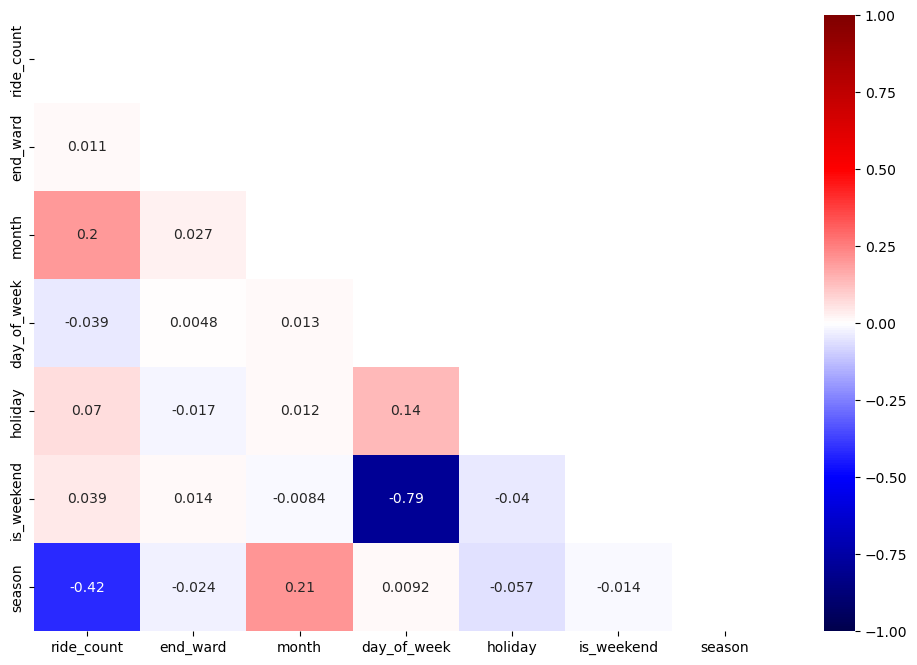

In [26]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df_daily.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

# Create a mask for the upper triangle
matrix = np.triu(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

# Merge dataframe with hourly dataframe

In [27]:
hdf = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\cbs_hourly_modified.csv', sep=",")

In [28]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
hdf['date'] = pd.to_datetime(hdf['date'])

In [29]:
# Ensure the 'date' column is a datetime
hdf['date'] = pd.to_datetime(hdf['date'])

# Aggregate hdf to daily values by taking the mean for the desired columns
hdf_daily = hdf.groupby('date', as_index=False).agg(
    relativehumidity=('relativehumidity', 'mean'),
    temperature=('temperature', 'mean'),
    windspeed=('windspeed', 'mean')
)

In [30]:
# Ensure 'date' in df_daily is also a datetime
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Merge the daily aggregated dataframes on 'date'
df_merged = df_daily.merge(hdf_daily, on='date', how='left')
display(df_merged)


,date,ride_count,end_ward,month,day_of_week,holiday,is_weekend,season,relativehumidity,temperature,windspeed
0,2023-01-01,21,6,1,6,0,0,3,83.375000,10.458333,9.466667
1,2023-01-02,14,6,1,0,0,1,3,83.375000,10.745833,7.525000
2,2023-01-03,19,6,1,1,1,1,3,89.541667,14.229167,13.316667
3,2023-01-04,28,7,1,2,1,1,3,91.250000,15.962500,11.308333
4,2023-01-05,25,6,1,3,1,1,3,83.500000,12.558333,7.295833
...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,7,6,12,2,1,1,3,52.000000,-4.350000,5.241667
361,2023-12-28,22,6,12,3,1,1,3,53.583333,-2.487500,7.650000
362,2023-12-29,16,6,12,4,1,1,3,57.791667,-3.904167,3.966667
363,2023-12-30,13,6,12,5,1,0,3,58.083333,-2.900000,7.933333


In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              365 non-null    datetime64[ns]
 1   ride_count        365 non-null    int64         
 2   end_ward          365 non-null    int64         
 3   month             365 non-null    int32         
 4   day_of_week       365 non-null    int64         
 5   holiday           365 non-null    int64         
 6   is_weekend        365 non-null    int64         
 7   season            365 non-null    int64         
 8   relativehumidity  365 non-null    float64       
 9   temperature       365 non-null    float64       
 10  windspeed         365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6)
memory usage: 30.1 KB


## Drop 'date', 'month', 'day_of_week'

In [32]:
# Drop columns
df_merged = df_merged.drop(columns=['date', 'month', 'day_of_week'])

In [33]:
multivariate = df_merged.drop('ride_count',axis='columns')
ride_count = df_merged["ride_count"]

print(multivariate.shape)
print(ride_count.shape)


(365, 7)
(365,)


In [34]:
type(ride_count)

pandas.core.series.Series

In [35]:
multivariate.columns

Index(['end_ward', 'holiday', 'is_weekend', 'season', 'relativehumidity',
       'temperature', 'windspeed'],
      dtype='object')

In [37]:
df_merged.rename(columns={'relativehumidity': 'humidity'}, inplace=True)

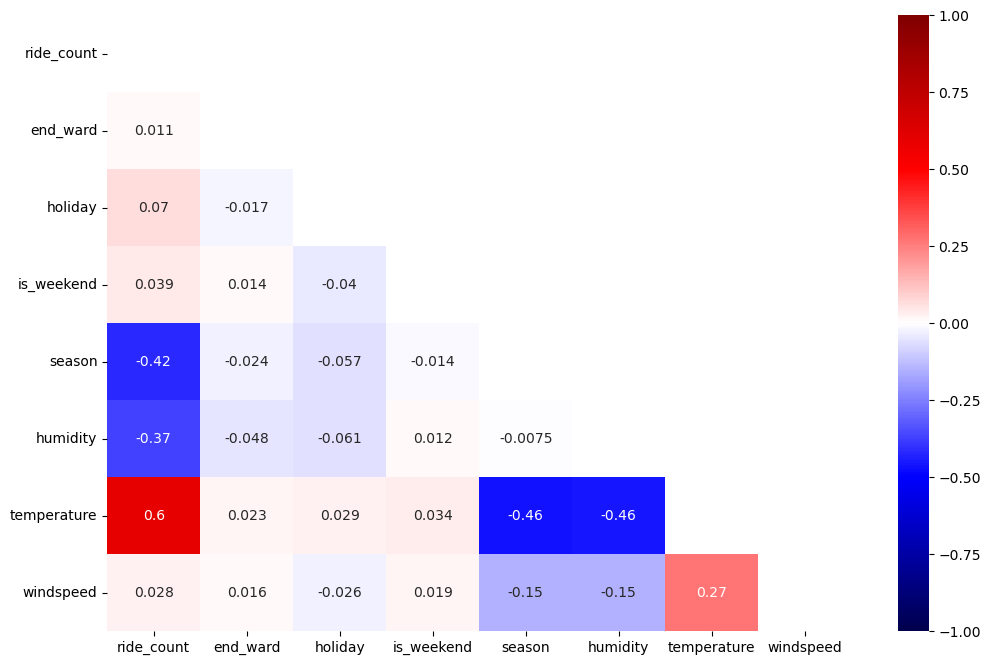

In [38]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df_merged.select_dtypes(include=['float64', 'int64', 'int32'])
corr = numeric_df.corr()

# Create a mask for the upper triangle
matrix = np.triu(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [39]:
# Reshape the dfs to have value for the column instead of a null.

ride_count = ride_count.values.reshape(-1, 1)

print(ride_count.shape)

(365, 1)


In [40]:
type(ride_count)

numpy.ndarray

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Predict Ride Count - Multivariate

In [44]:
multivariate_01_train, multivariate_01_test, ride_count_train, ride_count_test = train_test_split(multivariate, ride_count, test_size=0.2, random_state=10)

In [45]:
# Train the model

reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(multivariate_01_train, ride_count_train)

LinearRegression()

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
# Make predictions using the test data
y_pred = reg_multi_01.predict(multivariate_01_test)

# Evaluate performance
r2_score = round(reg_multi_01.score(multivariate_01_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: -79.2 %
Mean Squared Error: 172.08
Root Mean Squared Error: 13.12
Mean Absolute Error: 10.70


In [46]:
# Predict values using test data.
reg_multi_score = round(reg_multi_01.score(multivariate_01_test, ride_count_test) * 100, 2)
print("The accuracy of the ML model is:", reg_multi_score , "%")


The accuracy of the ML model is: 38.13 %


In [52]:
import pandas as pd

# Define the attributes with correct column names
feature_names = ['end_ward', 'holiday', 'is_weekend', 'season', 'relativehumidity', 'temperature', 'windspeed']

predictions = [7, 0, 0, 1, 20, 10, 10]

pred_3 = reg_multi_01.predict([predictions])


# Make prediction
pred_6 = reg_multi_01.predict([predictions])

# Print results
print(f"With the following conditions:\n"
      f"end_ward: {predictions[0]}"
      f"\nholiday: {predictions[1]}"
      f"\nis_weekend: {predictions[2]}"
      f"\nseason: {predictions[3]}"
      f"\nrelativehumidity: {predictions[4]}"
      f"\ntemperature: {predictions[5]}"
      f"\nwindspeed: {predictions[6]}"
      f"\n\nWe can expect {pred_6[0][0]:.2f} rides"
      f"\n\nThis model is {reg_multi_score:.2f}% accurate")

With the following conditions:
end_ward: 7
holiday: 0
is_weekend: 0
season: 1
relativehumidity: 20
temperature: 10
windspeed: 10

We can expect 29.56 rides

This model is 38.13% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Drop End Ward, Holiday, is_weekend

In [53]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ride_count   365 non-null    int64  
 1   end_ward     365 non-null    int64  
 2   holiday      365 non-null    int64  
 3   is_weekend   365 non-null    int64  
 4   season       365 non-null    int64  
 5   humidity     365 non-null    float64
 6   temperature  365 non-null    float64
 7   windspeed    365 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 22.9 KB


In [54]:
multivariate_02 = df_merged.drop(['end_ward', 'holiday', 'is_weekend', 'ride_count'],axis='columns')
ride_count = df_merged["ride_count"]

ride_count = ride_count.values.reshape(-1, 1)

print(multivariate_02.shape)
print(ride_count.shape)

(365, 4)
(365, 1)


In [55]:
multivariate_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       365 non-null    int64  
 1   humidity     365 non-null    float64
 2   temperature  365 non-null    float64
 3   windspeed    365 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.5 KB


In [56]:
multivariate_02_train, multivariate_02_test, ride_count_train, ride_count_test = train_test_split(multivariate_02, ride_count, test_size=0.2, random_state=0)

In [57]:
print(multivariate_02_train.shape)
print(multivariate_02_test.shape)
print(ride_count_train.shape)
print(ride_count_test.shape)

(292, 4)
(73, 4)
(292, 1)
(73, 1)


In [58]:
multivariate_02.columns

Index(['season', 'humidity', 'temperature', 'windspeed'], dtype='object')

In [59]:
# Train the model

reg_multi_02 = linear_model.LinearRegression()
reg_multi_02.fit(multivariate_02_train, ride_count_train)

LinearRegression()

In [60]:
# Predict values using test data.
reg_multi_score_02 = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)
print("The accuracy of the ML model based on Living Area is:", reg_multi_score_02 , "%")

The accuracy of the ML model based on Living Area is: 37.65 %


In [92]:
# Make predictions using the test data
y_pred = reg_multi_02.predict(multivariate_02_test)

reg_multi_score_02 = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)

# Evaluate performance
r2_score = round(reg_multi_02.score(multivariate_02_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 37.65 %
Mean Squared Error: 59.87
Root Mean Squared Error: 7.74
Mean Absolute Error: 6.43


In [61]:
# Enter the attributes ['season', 'humidity', 'temperature', 'windspeed']


predictions_02 = [1, 20, 10, 10]

pred_4 = reg_multi_02.predict([predictions_02])

print(f"With the following conditions: "
f"\nseason: {predictions_02[0]}"
f"\nhumidity: {predictions_02[1]}"
f"\n'temperature: {predictions_02[2]}"
f"\nwindspeedt: {predictions_02[3]}"
f"\n\nWe can expect {pred_4} rides"
f"\n\nThis model is {reg_multi_score_02}% accurate" )

With the following conditions: 
season: 1
humidity: 20
'temperature: 10
windspeedt: 10

We can expect [[31.15355187]] rides

This model is 37.65% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Drop Season

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ride_count   365 non-null    int64  
 1   end_ward     365 non-null    int64  
 2   holiday      365 non-null    int64  
 3   is_weekend   365 non-null    int64  
 4   season       365 non-null    int64  
 5   humidity     365 non-null    float64
 6   temperature  365 non-null    float64
 7   windspeed    365 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 22.9 KB


In [63]:
multivariate_03 = df_merged.drop(['end_ward', 'season', 'holiday', 'is_weekend', 'ride_count'],axis='columns')
ride_count = df_merged["ride_count"]

ride_count = ride_count.values.reshape(-1, 1)

print(multivariate_03.shape)
print(ride_count.shape)

(365, 3)
(365, 1)


In [64]:
multivariate_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   humidity     365 non-null    float64
 1   temperature  365 non-null    float64
 2   windspeed    365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [65]:
multivariate_03_train, multivariate_03_test, ride_count_train, ride_count_test = train_test_split(multivariate_03, ride_count, test_size=0.2, random_state=0)

In [66]:
print(multivariate_03_train.shape)
print(multivariate_03_test.shape)
print(ride_count_train.shape)
print(ride_count_test.shape)

(292, 3)
(73, 3)
(292, 1)
(73, 1)


In [67]:
multivariate_03.columns

Index(['humidity', 'temperature', 'windspeed'], dtype='object')

In [68]:
# Train the model

reg_multi_03 = linear_model.LinearRegression()
reg_multi_03.fit(multivariate_03_train, ride_count_train)

LinearRegression()

In [94]:
# Evaluate performance
r2_score = round(reg_multi_03.score(multivariate_03_test, ride_count_test) * 100, 2)
mse = mean_squared_error(ride_count_test, y_pred)
mae = mean_absolute_error(ride_count_test, y_pred)

# Print results
print(f"R² Score: {r2_score} %")
print(f"Mean Squared Error: {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 33.08 %
Mean Squared Error: 59.87
Root Mean Squared Error: 7.74
Mean Absolute Error: 6.43


In [69]:
# Predict values using test data.
reg_multi_score_03 = round(reg_multi_03.score(multivariate_03_test, ride_count_test) * 100, 2)
print("The accuracy of the ML model based on Living Area is:", reg_multi_score_03 , "%")

The accuracy of the ML model based on Living Area is: 33.08 %


In [70]:
# Enter the attributes ['humidity', 'temperature', 'windspeed']


predictions_03 = [20, 10, 10]

pred_3 = reg_multi_02.predict([predictions_02])

print(f"With the following conditions: "
f"\nhumidity: {predictions_03[0]}"
f"\ntemperature: {predictions_03[1]}"
f"\nwindspeed: {predictions_03[2]}"
f"\n\nWe can expect {pred_3} rides"
f"\n\nThis model is {reg_multi_score_03}% accurate" )

With the following conditions: 
humidity: 20
temperature: 10
windspeed: 10

We can expect [[31.15355187]] rides

This model is 33.08% accurate


c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(multivariate_02, ride_count)

LinearRegression()

In [72]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(multivariate_02)

poly.fit(X_poly, ride_count)
lin2 = LinearRegression()
lin2.fit(X_poly, ride_count)

LinearRegression()

In [73]:
print(multivariate_02.shape)
print(ride_count.shape)

(365, 4)
(365, 1)


# Evaluation

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Standardize features (recommended for KNN & Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, Y_train)

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train_scaled, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test_scaled, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test_scaled, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test_scaled, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test_scaled, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_01_train, ride_count_train, multivariate_01_test, ride_count_test)

Linear Regression R² Score: 0.0239
KNN R² Score: -0.2496
Decision Tree R² Score: -0.9992
Random Forest R² Score: -0.0100


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Standardize features (recommended for KNN & Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, Y_train)

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train_scaled, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test_scaled, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test_scaled, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test_scaled, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test_scaled, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_02_train, ride_count_train, multivariate_02_test, ride_count_test)

Linear Regression R² Score: 0.3765
KNN R² Score: 0.3393
Decision Tree R² Score: 0.0772
Random Forest R² Score: 0.4538


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a function with multiple ML models
def models(X_train, Y_train, X_test, Y_test):
    # Standardize features (recommended for KNN & Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert Y_train to a 1D array
    Y_train = Y_train.ravel()

    ### 1️⃣ Linear Regression ###
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, Y_train)

    ### 2️⃣ K-Nearest Neighbors Regression ###
    knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train_scaled, Y_train)

    ### 3️⃣ Decision Tree Regression ###
    tree = DecisionTreeRegressor(criterion='squared_error', random_state=0)
    tree.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### 4️⃣ Random Forest Regression ###
    forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)
    forest.fit(X_train_scaled, Y_train)  # Now using scaled data

    ### ✅ Print Model Scores ###
    print(f"Linear Regression R² Score: {linreg.score(X_test_scaled, Y_test):.4f}")
    print(f"KNN R² Score: {knn.score(X_test_scaled, Y_test):.4f}")
    print(f"Decision Tree R² Score: {tree.score(X_test_scaled, Y_test):.4f}")
    print(f"Random Forest R² Score: {forest.score(X_test_scaled, Y_test):.4f}")

    return linreg, knn, tree, forest

# Call the function with the proper train-test split
models(multivariate_03_train, ride_count_train, multivariate_03_test, ride_count_test)

Linear Regression R² Score: 0.3308
KNN R² Score: 0.2804
Decision Tree R² Score: -0.1892
Random Forest R² Score: 0.3775


(LinearRegression(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=0),
 RandomForestRegressor(random_state=0))

## MAE

In [77]:
# Features: 'end_ward', 'holiday', 'is_weekend', 'season', 'relativehumidity', 'temperature', 'windspeed'
from sklearn.metrics import mean_absolute_error

# Generate predictions using the test data
y_pred = reg_multi_01.predict(multivariate_01_test)

# Calculate and print the Mean Absolute Error
print("MAE", mean_absolute_error(ride_count_test, y_pred))

MAE 10.699165610239668


In [78]:
# Features: 'season', 'humidity', 'temperature', 'windspeed'
# Generate predictions using the test data
y_pred = reg_multi_02.predict(multivariate_02_test)

# Calculate and print the Mean Absolute Error
print("MAE", mean_absolute_error(ride_count_test, y_pred))

MAE 6.432869093049054


In [79]:
# Features:  'humidity', 'temperature', 'windspeed'
# Generate predictions using the test data
y_pred = reg_multi_03.predict(multivariate_03_test)

# Calculate and print the Mean Absolute Error
print("MAE", mean_absolute_error(ride_count_test, y_pred))

MAE 6.580933494294069


## MSE

In [81]:
# Features: 'end_ward', 'holiday', 'is_weekend', 'season', 'humidity', 'temperature', 'windspeed'
from sklearn.metrics import mean_absolute_error

# Generate predictions using the test data
y_pred = reg_multi_01.predict(multivariate_01_test)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ride_count_test,y_pred))

MSE 172.07808225665784


In [82]:
# Features: 'season', 'humidity', 'temperature', 'windspeed'
from sklearn.metrics import mean_absolute_error

# Generate predictions using the test data
y_pred = reg_multi_02.predict(multivariate_02_test)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ride_count_test,y_pred))

MSE 59.87057225888776


In [83]:
# Features:  'humidity', 'temperature', 'windspeed'
from sklearn.metrics import mean_absolute_error

# Generate predictions using the test data
y_pred = reg_multi_03.predict(multivariate_03_test)

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(ride_count_test,y_pred))

MSE 64.26155770912248


In [96]:
# Define the metrics for each model
metrics_data = {
    "Model": ["7 Features", "4 Features", "3 Features"],
    "R² Score (%)": [reg_multi_score, reg_multi_score_02, reg_multi_score_03],
    "Mean Absolute Error (MAE)": [
        mean_absolute_error(ride_count_test, reg_multi_01.predict(multivariate_01_test)),
        mean_absolute_error(ride_count_test, reg_multi_02.predict(multivariate_02_test)),
        mean_absolute_error(ride_count_test, reg_multi_03.predict(multivariate_03_test))
    ],
    "Mean Squared Error (MSE)": [
        mean_squared_error(ride_count_test, reg_multi_01.predict(multivariate_01_test)),
        mean_squared_error(ride_count_test, reg_multi_02.predict(multivariate_02_test)),
        mean_squared_error(ride_count_test, reg_multi_03.predict(multivariate_03_test))
    ]
}

# Create the dataframe
metrics_df = pd.DataFrame(metrics_data)

# Add a column for Root Mean Squared Error (RMSE)
metrics_df["Root Mean Squared Error (RMSE)"] = [
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_01.predict(multivariate_01_test))),
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_02.predict(multivariate_02_test))),
    np.sqrt(mean_squared_error(ride_count_test, reg_multi_03.predict(multivariate_03_test)))
]


# Display the dataframe
metrics_df.round(2)

,Model,R² Score (%),Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)
0,7 Features,38.13,10.70,172.08,13.12
1,4 Features,37.65,6.43,59.87,7.74
2,3 Features,33.08,6.58,64.26,8.02
